# 1. Definition
A **multi-class classification** is a *classification technique that allows us to categorize data* with **more than two class labels.**

**Logistic regression** is a statistical method used for **binary classification,** which predicts the probability that a given input belongs to **one of two possible categories.** When dealing with **multiclass classification,** where there are **more than two classes,** logistic regression can be extended using techniques such as:

### A. One-vs-Rest (OvR) or One-vs-All (OvA):
* This approach involves training a **separate binary classifier for each class.** <br>
* For **each classifier, one class is treated as the positive class,** and all **other classes are treated as the negative class.**
* During prediction, the **class with the highest probability** is chosen as the final prediction.

### B. Multinomial Logistic Regression:
* Also known as **Softmax Regression,** this approach generalizes **logistic regression** to handle multiple classes directly.
* Instead of using a **single sigmoid function,** it uses the **softmax function** to **predict the probabilities of each class.**
* The **softmax function** ensures that the **sum of the predicted probabilities for all classes is equal to 1.**


**Thanks To:**
* [Optical Recognition of Handwritten Digits](https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits)
* [*sklearn.datasets*.**load_digits**](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)
* [Recognizing hand-written digits](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html)

# 2. Import libraries

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# 3. Load dataset

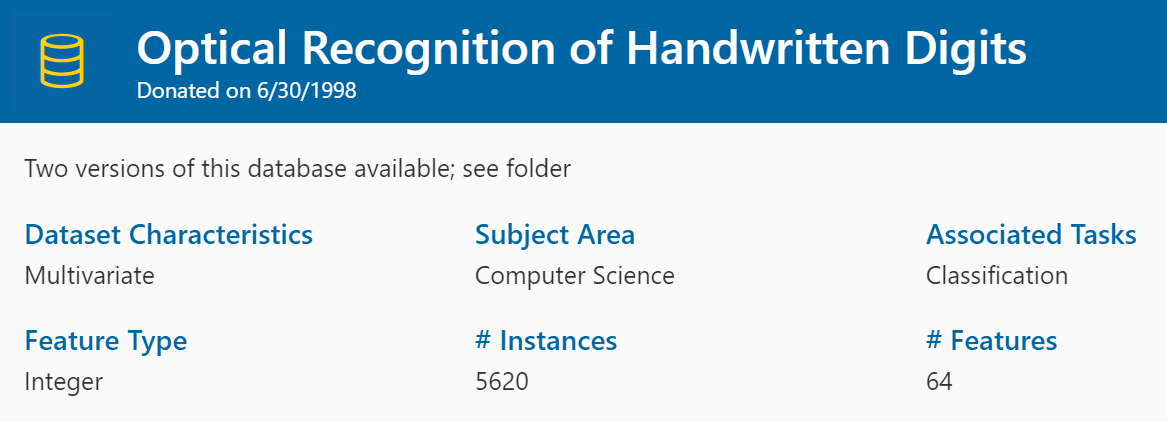

### Each datapoint is a 8x8 image of a digit.
##### from pixel_0_0 to pixel_0_7 like that
##### pixel_1_0 to pixel_1_7
#####. . .
##### pixel_7_0 to pixel_7_7

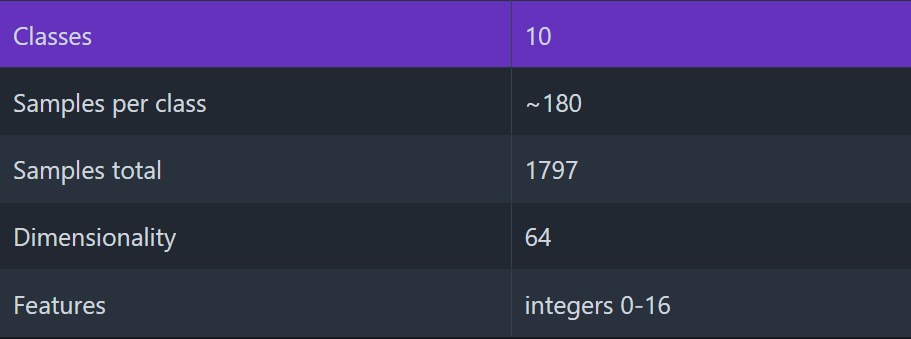

In [2]:
# load hand written digit dataset from sklearn library
digits = load_digits()
# read all the attributes of digit dataset
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

# 4. Dataset EDA (Exploratory Data Analysis)

In [3]:
# number of features in the digit dataset
len(digits.feature_names)

64

In [4]:
# feature names of digit dataset row index
digits.feature_names[8:15]

['pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6']

In [5]:
# feature's length (number of instances) of the dataset
len(digits.data)

1797

In [6]:
# target's length of the dataset
len(digits.target)

1797

In [7]:
# shape matrix rows and columns of the dataset
digits.data.shape

(1797, 64)

In [8]:
# shape matrix rows and columns of the images
digits.images.shape

(1797, 8, 8)

In [9]:
# number of categories (multi-class) in the target
len(digits.target_names)

10

In [10]:
# different categories (multi-class) of the target
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# 5. Data Visualization

Visualize the first 3 images of hand written digit dataset. The target attribute of the dataset stores <br>the digit image represents and this is included in the title of the 3 plots below.

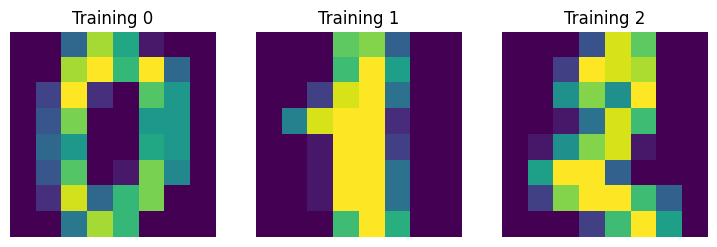

In [11]:
%matplotlib inline
# for i in range(3):
#   plt.matshow(digits.images[i])

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(9, 3))

for ax, img, label in zip(ax, digits.images, digits.target):
  ax.set_axis_off()
  # ax.imshow(img, cmap=plt.cm.gray, interpolation='nearest')     # gray colormap in a matplotlib subplot
  ax.imshow(img, cmap='viridis', interpolation='nearest')       # colorful colormap in a matplotlib subplot
  ax.set_title("Training %i" % label)

In [12]:
# verify the first 3 target attribute from digit dataset
digits.target[0:3]

array([0, 1, 2])

In [13]:
# the first 3 target attribute class from digit dataset
digits.target_names[0:3]

array([0, 1, 2])

# 6. Data Preprocessing
## Flattening the 2-D array
The **digit dataset,** usually consists of images in a **2-D array format (e.g., 8x8 pixels). Logistic regression** requires the input to be in a **1-D array format.** Therefore, you need to **flatten the 2-D arrays into 1-D arrays (vectors).**
<br>
#### For instance, a **8x8 image** would be **flattened** into a **vector of size 64.**

In [14]:
# flatten the images
data = digits.images.reshape((len(digits.images), -1))
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

# 7. Data distribution into train and test dataset

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# split the digit dataset into training and test dataset.
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.25)

In [17]:
# length of independent training dataset variables
len(X_train)

1347

In [18]:
# length of dependent training dataset variables
len(X_test)

450

# 8. Model creation (Logistic Regression)

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

The warning you're seeing indicates that the **Logistic Regression** model in **scikit-learn** did not converge within the default number of iterations. Here are some steps you can take to resolve this issue:

#### 1. Increase the Number of Iterations:
You can increase the **max_iter** parameter, which sets the *maximum number of iterations* for the solver to converge.
```
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200)  # Increase the number of iterations
model.fit(X, y)
```
#### 2. Scale the Data:
Scaling your data can improve convergence. **Standardizing** features by removing the **mean** and **scaling to unit variance** can help. You can use **StandardScaler** from **scikit-learn** for this purpose.
```
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
model = LogisticRegression(max_iter=200)
pipeline = make_pipeline(scaler, model)

pipeline.fit(X, y)
```
#### 3. Try Different Solvers:
You can try using different solvers like **'liblinear', 'saga', or 'newton-cg'**. Different solvers have different strengths and might perform better depending on your data.
```
model = LogisticRegression(solver='liblinear')  # Try a different solver
model.fit(X, y)
```
#### 4. Refer to Documentation:
For more details, you can refer to the [scikit-learn documentation.](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)
<br>
By applying one or a combination of these steps, you should be able to resolve the *convergence warning.*

## 8.1 Data scaling for better convergence.
#### Standardizing features by removing the **mean** and **scaling to unit variance**

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
model = LogisticRegression(max_iter=200)
pipeline = make_pipeline(scaler, model)

# train the model by using training digit dataset
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=200))])

In [21]:
# length of validation digit dataset
len(model.predict(X_test))

450

# 9. Data Validation

In [22]:
# validation accuracy score of digit dataset
model.score(X_test, y_test)

0.8666666666666667

## 9.1 Build the [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report) showing the main classification metrics.

In [23]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print(
    f"\nAccuracy Score:     {accuracy_score(y_test, model.predict(X_test))}\n",
    f"\nClassification Report:\n{classification_report(y_test, model.predict(X_test))}\n",
)


Accuracy Score:     0.8666666666666667
 
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        46
           1       0.55      1.00      0.71        48
           2       0.98      0.84      0.90        49
           3       1.00      0.86      0.92        43
           4       1.00      0.42      0.59        45
           5       0.97      0.84      0.90        45
           6       0.93      1.00      0.96        39
           7       1.00      0.89      0.94        55
           8       0.87      0.87      0.87        38
           9       0.79      0.98      0.87        42

    accuracy                           0.87       450
   macro avg       0.91      0.87      0.87       450
weighted avg       0.91      0.87      0.87       450




In [24]:
model.predict([digits.data[2]])

array([1])

In [25]:
model.predict(digits.data[0:3])

array([0, 1, 1])

## 9.2 Prediction of digit dataset

In [26]:
# prediction of validation digit dataset
y_pred = model.predict(X_test)

# 10. Model (Data) Evaluation
## 10.1 Confusion matrix
Plot a [confusion matrix](https://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix) of the **true digit** values and the **predicted digit** values.

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

## 10.2 Seaborn
**Seaborn** is a library for making statistical graphics in Python. It builds on top of **matplotlib** and integrates closely with **pandas data structures**.

In [28]:
import seaborn as sb

## 10.3 Confusion Matrix
A confusion matrix is a useful tool for evaluating the accuracy performance of a **classification model.**

In [29]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[45,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 48,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  8, 41,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 37,  0,  0,  0,  0,  3,  2],
       [ 0, 20,  0,  0, 19,  0,  3,  0,  0,  3],
       [ 0,  3,  0,  0,  0, 38,  0,  0,  0,  4],
       [ 0,  0,  0,  0,  0,  0, 39,  0,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0, 49,  1,  2],
       [ 0,  5,  0,  0,  0,  0,  0,  0, 33,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 41]])

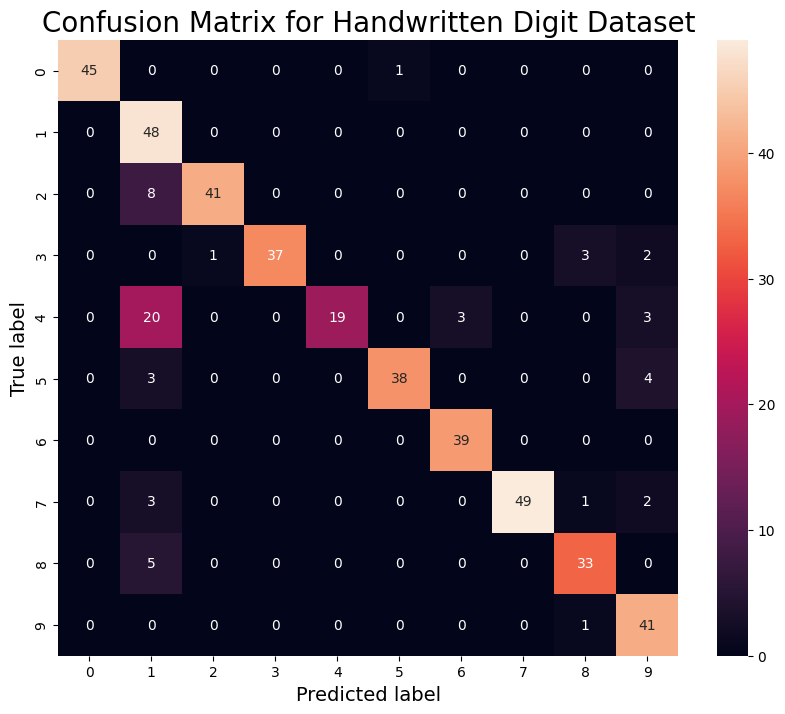

In [30]:
plt.figure(figsize=(10, 8))
sb.heatmap(cm, annot=True)
plt.xlabel('Predicted label', fontsize=14)
plt.ylabel('True label', fontsize=14)
plt.title('Confusion Matrix for Handwritten Digit Dataset\n', fontsize=20)
plt.show()

## 10.4 ConfusionMatrixDisplay
Combination of **confusion matrix** and **seaborn** library in a single plot.

Confusion Matrix for Handwritten Digit Dataset:
[[45  0  0  0  0  1  0  0  0  0]
 [ 0 48  0  0  0  0  0  0  0  0]
 [ 0  8 41  0  0  0  0  0  0  0]
 [ 0  0  1 37  0  0  0  0  3  2]
 [ 0 20  0  0 19  0  3  0  0  3]
 [ 0  3  0  0  0 38  0  0  0  4]
 [ 0  0  0  0  0  0 39  0  0  0]
 [ 0  3  0  0  0  0  0 49  1  2]
 [ 0  5  0  0  0  0  0  0 33  0]
 [ 0  0  0  0  0  0  0  0  1 41]]


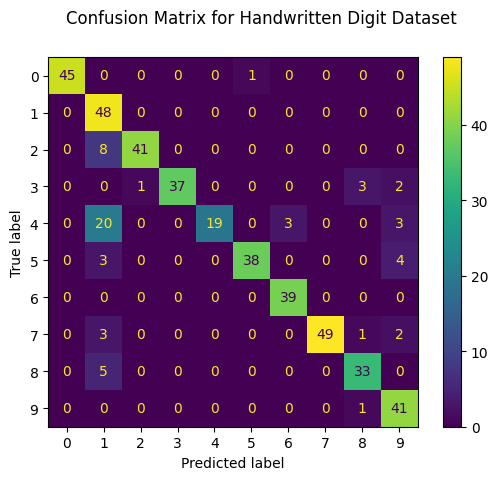

In [31]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.figure_.suptitle("Confusion Matrix for Handwritten Digit Dataset")
print(f"Confusion Matrix for Handwritten Digit Dataset:\n{disp.confusion_matrix}")
plt.show()